In [44]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style

#create dataframe
df = pd.read_csv("heart_2020_cleaned.csv")

In [56]:
#what's the shape?
df.shape

#info
df.info()

#describe
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [46]:
# find a correlation
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,BMI,PhysicalHealth,MentalHealth,SleepTime
BMI,1.000000,0.109788,0.064131,-0.051822
PhysicalHealth,0.109788,1.000000,0.287987,-0.061387
MentalHealth,0.064131,0.287987,1.000000,-0.119717
SleepTime,-0.051822,-0.061387,-0.119717,1.000000


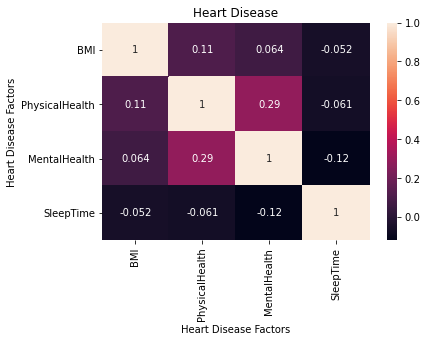

<Figure size 432x288 with 0 Axes>

In [47]:
#heatmap
hm = sns.heatmap(df.corr(), annot = True)
hm.set(xlabel='Heart Disease Factors', ylabel='Heart Disease Factors', title = 'Heart Disease')
plt.show()
plt.savefig("Heart_Disease_Corr_W_Titles.png")

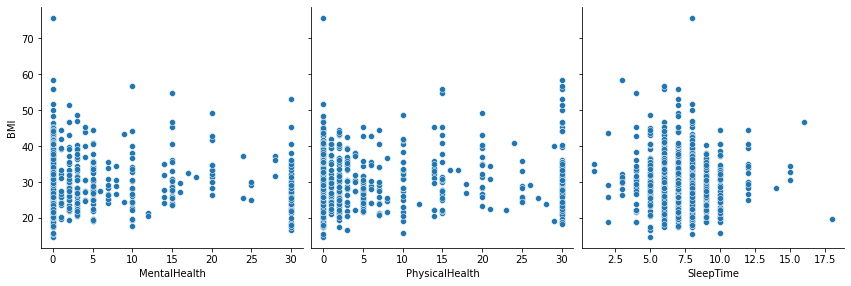

In [104]:
#pairplot
sns.pairplot(df.head(1000),x_vars = ["MentalHealth","PhysicalHealth","SleepTime"], 
             y_vars="BMI", height = 4, aspect = 1, kind="scatter")
plt.show()

In [105]:
#create a model
X=df['MentalHealth']
y=df["BMI"]

In [106]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7,
                                                   test_size = 0.3, random_state = 100)

In [107]:
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train)

In [108]:
#fit the regression line using OLS
lr = sm.OLS(y_train, X_train_sm).fit()

#print the parameters
lr.params

const           28.124770
MentalHealth     0.051662
dtype: float64

In [110]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    BMI   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     938.8
Date:                Mon, 18 Apr 2022   Prob (F-statistic):          9.55e-206
Time:                        16:28:33   Log-Likelihood:            -7.3099e+05
No. Observations:              223856   AIC:                         1.462e+06
Df Residuals:                  223854   BIC:                         1.462e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           28.1248      0.015   1885.391      0.000      28.096      28.154
MentalHealth     0.0517      0.002     30.640      0.000       0.048       0.055
==============================================================================
Omnibus:                    57830.888   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           194861.473
Skew:                           1.297   Prob(JB):                         0.00
Kurtosis:                       6.763   Cond. No.                         9.88
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

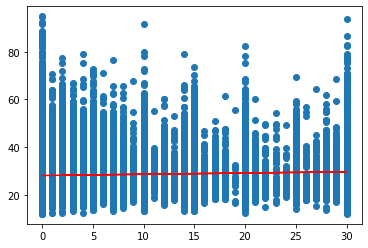

In [112]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 28.1248 + 0.0517*X_train, 'r')
plt.show()